<a href="https://colab.research.google.com/github/dhruvk98/Machine-Learning-Datasets/blob/master/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Regression Problem
A Regression problem to determine the price of a house on the basis of several factors.

## Importing our Dataset


In [1]:
# Importing our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing our dataset
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df.shape

(506, 13)

In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [6]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exploratory Data Analysis

Let us check our dataframe to try and understand it more clearly.

In [7]:
df.describe().T # increases readability

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


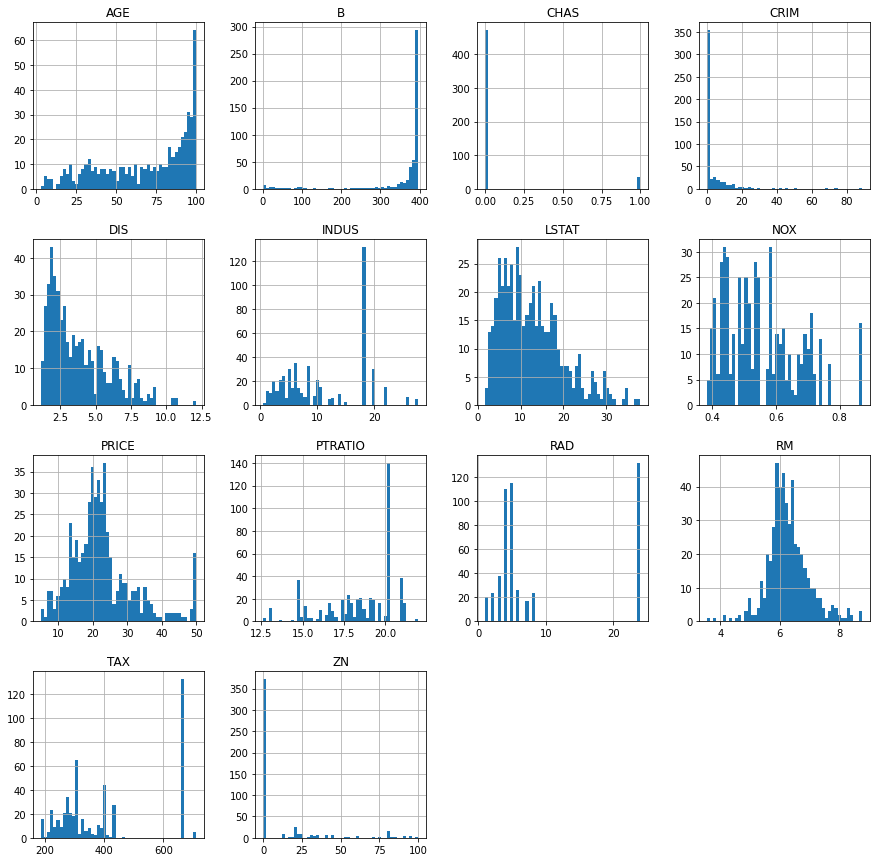

In [8]:
# gives us histogram of each numerical feature
df.hist(bins=50,figsize=(15,15))
plt.show()

Let us inspect our target variable PRICE more closely to see its distribution. 

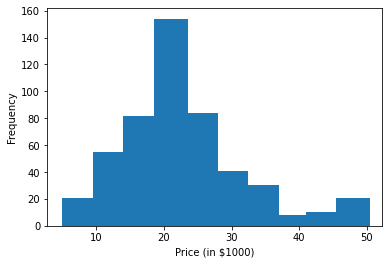

In [9]:
# Exploring the price of houses 
plt.hist(df['PRICE'],width=5)
plt.xlabel('Price (in $1000)')
plt.ylabel('Frequency')
plt.show()

Since we see our PRICE feature has multiple outliers, we drop these rows.

In [108]:
df = df[~(df['PRICE'] >= 50.0)]
df.shape

(490, 14)

Let's check the correlation between our features.

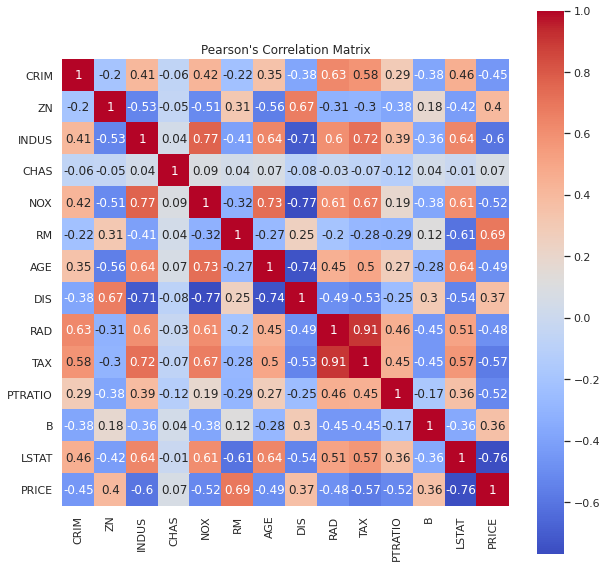

In [102]:
cm = df.corr().round(2)
sns.set(rc={'figure.figsize':(10,10)})
plt.title('Pearson\'s Correlation Matrix')
sns.heatmap(data=cm,
            cmap='coolwarm',
            square=True,
            annot=True) # shows correlation between features of the dataset
plt.show()

In [12]:
cm['PRICE'].sort_values(ascending=False)

PRICE      1.00
RM         0.70
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
RAD       -0.38
AGE       -0.38
CRIM      -0.39
NOX       -0.43
TAX       -0.47
INDUS     -0.48
PTRATIO   -0.51
LSTAT     -0.74
Name: PRICE, dtype: float64

Since we see that most of our features have a negative correlation with the target variable price, we create a new dataframe to test if our regression models can perform better without these features. 

In [13]:
df_new = df.drop(['LSTAT','PTRATIO','INDUS','TAX','NOX','CRIM','AGE','RAD'],axis=1)
df_new.head()

,ZN,CHAS,RM,DIS,B,PRICE
0,18.0,0.0,6.575,4.0900,396.90,24.0
1,0.0,0.0,6.421,4.9671,396.90,21.6
2,0.0,0.0,7.185,4.9671,392.83,34.7
3,0.0,0.0,6.998,6.0622,394.63,33.4
4,0.0,0.0,7.147,6.0622,396.90,36.2


We will test our model on this dataframe later. For now let's have a look at the correlation matrix for this dataframe. 

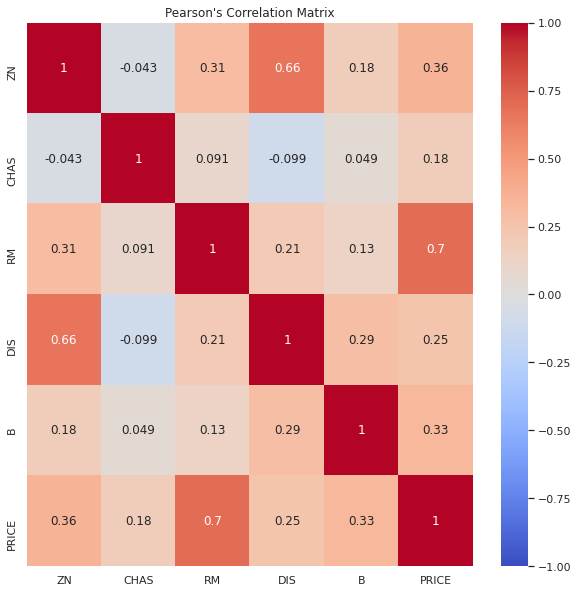

In [14]:
# Pearson's correlation matrix
cm_new = df_new.corr()
# mask = np.zeros_like(cm_new, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True # removes upper triangle of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_new,annot=True,
            vmin=-1,cmap='coolwarm',
            )
plt.title('Pearson\'s Correlation Matrix')
plt.show()

## Data Preprocessing

Before applying any model, let's scale our data.

In [103]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit_transform(df)

array([[-0.41740129,  0.30181252, -1.29185589, ...,  0.44353452,
        -1.12267925,  0.3008782 ],
       [-0.41499231, -0.4869242 , -0.59332877, ...,  0.44353452,
        -0.53477219, -0.00457135],
       [-0.41499461, -0.4869242 , -0.59332877, ...,  0.39955339,
        -1.25693687,  1.66267415],
       ...,
       [-0.41115333, -0.4869242 ,  0.11987329, ...,  0.44353452,
        -1.02940553,  0.28815114],
       [-0.40554922, -0.4869242 ,  0.11987329, ...,  0.40625322,
        -0.91069353,  0.04633691],
       [-0.41268548, -0.4869242 ,  0.11987329, ...,  0.44353452,
        -0.71284019, -1.23909665]])

Let's check our dataframe to see the results after scaling our data. 

In [104]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
np.random.seed(42) # used to make output of notebook identical each time
X = df.drop('PRICE', axis=1)
y = df['PRICE']
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(404, 13) (102, 13)
(404,) (102,)


## Model Selection

### Linear Regression


In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

Let's make a graph to see how our Linear Regression model fits our data.

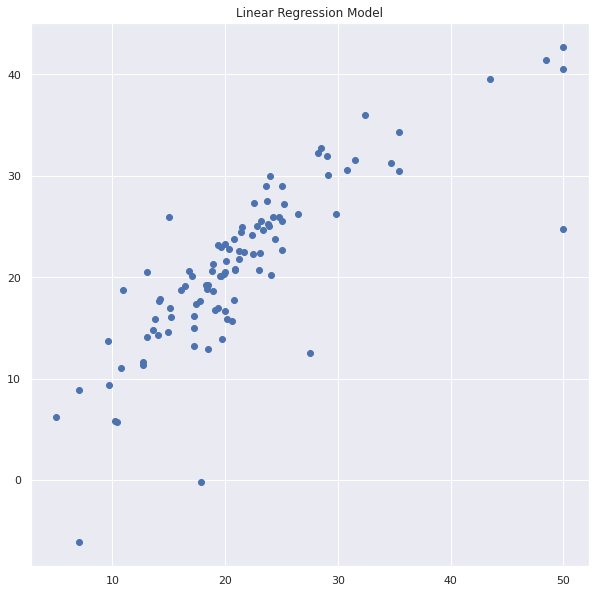

In [110]:
# Plot outputs
# sns.regplot(x='RM',y='PRICE',data=df)
plt.scatter(y_test,y_lr)
plt.title('Linear Regression Model')
plt.show()

Let us evaluate our model on the following metrics - 

1. **R2 Score:** A score function (the higher the better)
2. **RMSE:** A cost function (the lower the better)

In [92]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score:',r2_score(y_test,y_lr))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_lr)))

R2 Score: 0.668759493535633
RMSE: 4.928602182665329


### Support Vector Regression

In [0]:
from sklearn.svm import SVR
svr = SVR() 
svr.fit(X_train,y_train)
y_svr = svr.predict(X_test)

In [93]:
print('R2 Score:',r2_score(y_test,y_svr))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_svr)))

R2 Score: 0.27948125010200275
RMSE: 7.269000327965785


### Decision Tree Regressor

In [0]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_dtr = dtr.predict(X_test)

In [94]:
print('R2 Score:',r2_score(y_test,y_dtr))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_dtr)))

R2 Score: 0.8464287494933579
RMSE: 3.3558845010389926


### Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_rf = rf.predict(X_test)

In [95]:
print('R2 Score:',r2_score(y_test,y_rf))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_rf)))

R2 Score: 0.872949628258021
RMSE: 3.052389950803257


## Grid Search for best parameters
Since our Random Forest Regression Model returns our best R2 Score/RMSE we aim to find the best parameters for this regressor.

In [0]:
# arbitrary grid search to find best parameters for random forest
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [50, 100, 150, 200],
     'max_features' : [2, 4, 6, 8, 10]}
  ]

grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X, y)

The best hyperparameter combination found:

In [0]:
grid_search.best_params_

In [0]:
grid_search.best_estimator_

The best score found:

In [0]:
grid_search.best_score_

A comparison of regressors with different hyperparameters:

In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

## An arbitrary pipeline

In [0]:
# creating a pipeline for data preparation and model prediction
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

col_ix = [0,1,2,3,4,5,6,7,8,9,10,11,12]
t = [('num', StandardScaler(), col_ix )]
col_transform = ColumnTransformer(transformers=t)
 
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)],verbose=True)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, scoring='r2', cv=cv, verbose=2, n_jobs=-1)
print(np.mean(scores))